# Exploratory Visualization (_Humming_)

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as sps
import seaborn as sns
import sklearn

from pathlib import Path

## Retrieve and Subset Datasource

Retrieve all good trials for IDs that came from Javier's algorithm.

In [2]:
notebook_song_name = 'humming'

In [3]:
data_root = Path('../../neural_nets/fastai/import-humming/data')

df_all = pd.read_csv(data_root / 'good_reaction_trials_categorified_no_impute.csv')

df_all = df_all[df_all.song == 'humming']

pd.set_option('display.max_columns', None)
df_all.describe()

,age,personality_trusting,personality_artistic,personality_imagination,personality_reserved,personality_outgoing,personality_lazy,personality_stress,personality_nervous,personality_fault,personality_thorough,musical_expertise,concentration,control_power,control_like_dislike,control_tension,control_engagement,control_activity,control_positivity,control_familiarity,song_power,song_like_dislike,song_tension,song_engagement,song_activity,song_positivity,song_familiarity,musicpref_world,musicpref_folk,musicpref_classical,musicpref_dance,musicpref_rock,musicpref_pop,musicpref_jazz,musicpref_hiphop
count,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.0,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.000000,76.00000,76.000000,76.000000,76.000000
mean,19.855263,3.552632,2.210526,4.026316,3.131579,3.065789,3.644737,3.039474,3.671053,3.460526,3.039474,2.473684,3.789474,3.276316,2.934211,3.342105,3.210526,2.868421,3.171053,-1.0,3.447368,3.421053,3.302632,3.881579,3.421053,3.052632,1.539474,0.118421,0.092105,0.263158,0.078947,0.25000,0.789474,0.144737,0.052632
std,9.948808,1.063262,1.135086,0.965729,1.024267,1.147002,1.196706,1.088617,1.170620,0.839695,1.012466,1.089020,1.023924,1.161593,1.024181,1.013938,1.135086,0.869362,0.870068,0.0,1.011860,1.180544,1.107787,0.992869,0.955868,1.056974,1.076300,0.325253,0.291096,0.443273,0.271448,0.43589,0.410391,0.354173,0.224781
min,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,-1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,12.000000,3.000000,1.000000,4.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000,-1.0,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
50%,18.000000,4.000000,2.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,-1.0,3.500000,3.500000,3.000000,4.000000,4.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,25.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,-1.0,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.25000,1.000000,0.000000,0.000000
max,48.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,-1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [4]:
print(f"Total N: {df_all.shape[0]}")

Total N: 76


In [5]:
df_reaction = df_all[df_all['critical_reaction'] == True]
df_no_reaction = df_all[df_all['critical_reaction'] == False]

In [6]:
print(f"Total reaction N: {df_reaction.shape[0]}")
print(f"Total no-reaction N: {df_no_reaction.shape[0]}")

Total reaction N: 47
Total no-reaction N: 29


In [7]:
df_all.columns

Index(['_id', 'location', 'language', 'nationality', 'age', 'sex',
       'hearing_impairments', 'personality_trusting', 'personality_artistic',
       'personality_imagination', 'personality_reserved',
       'personality_outgoing', 'personality_lazy', 'personality_stress',
       'personality_nervous', 'personality_fault', 'personality_thorough',
       'musical_expertise', 'concentration', 'critical_reaction',
       'control_power', 'control_like_dislike', 'control_tension',
       'control_engagement', 'control_activity', 'control_positivity',
       'control_familiarity', 'song_power', 'song_like_dislike',
       'song_tension', 'song_engagement', 'song_activity', 'song_positivity',
       'song_familiarity', 'song', 'musicpref_world', 'musicpref_folk',
       'musicpref_classical', 'musicpref_dance', 'musicpref_rock',
       'musicpref_pop', 'musicpref_jazz', 'musicpref_hiphop'],
      dtype='object')

In [63]:
cat_cols = ['location', 'language', 'nationality', 'sex', 
            'hearing_impairments']

personality_cols = ['personality_trusting', 'personality_artistic', 
            'personality_imagination', 'personality_reserved',
            'personality_outgoing', 'personality_lazy', 'personality_stress',
            'personality_nervous', 'personality_fault', 'personality_thorough']

ord_cols = ['musical_expertise', 'concentration', 
            'song_power', 'song_like_dislike',
            'song_tension', 'song_engagement', 'song_activity', 'song_positivity',
            'song_familiarity', 'musicpref_world', 'musicpref_folk',
            'musicpref_classical', 'musicpref_dance', 'musicpref_rock',
            'musicpref_pop', 'musicpref_jazz', 'musicpref_hiphop']

cont_cols = ['age']

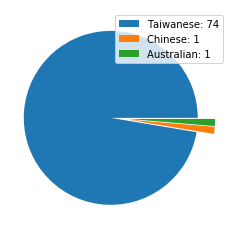

In [64]:
nationality_counts = df_all['nationality'].value_counts()
patches, texts = plt.pie(nationality_counts, 
                                    explode=[0.1] * len(nationality_counts));

labels = ['{}: {}'.format(x.capitalize(), nationality_counts[x]) for x in nationality_counts.index]

plt.legend(patches, labels)
plt.savefig('hallelujah_reaction_pie_nationalities_{}_new_split.pdf'.format(notebook_song_name))

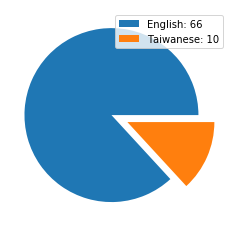

In [65]:
language_counts = df_all['language'].value_counts()
patches, texts = plt.pie(language_counts, 
                                    explode=[0.1] * len(language_counts));

languages = list(language_counts.index)
for i in range(len(languages)):
    language = languages[i]
    if language == 'en':
        languages[i] = 'English'
    elif language == 'zh_TW':
        languages[i] = 'Taiwanese'

labels = ['{}: {}'.format(languages[i].capitalize(), language_counts[x]) for i, x in enumerate(language_counts.index)]

plt.legend(patches, labels)
plt.savefig('hallelujah_reaction_pie_languages_{}_new_split.pdf'.format(notebook_song_name))

In [66]:
def mardia(data, unbiased_cov=True):
    """
    data should have observations in rows
    """
    import numpy as np
    import scipy.stats as sps
    
    n = data.shape[0]
    p = data.shape[1]

    S = None
    if unbiased_cov:
        S = ((n - 1.) / n) * np.cov(data, rowvar=False)
    else:
        S = np.cov(data, rowvar=False)

    data_scaled = (data - data.mean(axis=0))

    D = np.matmul(np.matmul(data_scaled, np.linalg.pinv(S, rcond=1e-25)), data_scaled.T)

    product = D * D * D
    skewness = np.sum(product) / n**2
    kurtosis = (D * D).diagonal().sum() / n
    df = p * (p + 1) * (p + 2) / 6
    k = ((p + 1)*(n + 1)*(n + 3))/(n*((n + 1)*(p + 1) - 6))
    
    skew, kurt, skew_p, kurt_p = None, None, None, None
    if n < 20:
        skew = n * k * skewness / 6.
    else:
        skew = n * skewness / 6.
    
    chi2_test_skew = sps.chi2(df)
    skew_p = 1. - chi2_test_skew.cdf(skew)
    
    skew_result = False
    if skew_p > 0.05:
        skew_result = True
    
    kurt = (kurtosis - p * (p + 2)) * np.sqrt(n / (8 * p * (p + 2)))
    
    normal_test_kurt = sps.norm()
    kurt_p = 2. * (1. - normal_test_kurt.cdf(np.abs(kurt)))
    
    kurt_result = False
    if kurt_p  > 0.05:
        kurt_result = True
    
    result_skewness = {
        'test': 'Mardia Skewness',
        'statistic': skew,
        'p-value': skew_p,
        'result': skew_result
    }
    
    result_kurtosis = {
        'test': 'Mardia Kurtosis',
        'statistic': kurt,
        'p-value': kurt_p,
        'result': kurt_result
    }
    
    result = {
        'test': 'MVN',
        'statistic': None,
        'p-value': None,
        'result': skew_result and kurt_result
    }
    
    return result_skewness, result_kurtosis, result

In [67]:
def run_tests(x_label, dist_var, bins=None, normed=False, kde=True, bw='normal_reference', x_lim=None, plots=False, print_output=False):
    
    if plots:
        f = plt.figure(figsize=(8, 4))
        sns.distplot(df_all[dist_var].dropna(), bins=bins, norm_hist=normed, kde=kde, rug=True, kde_kws={'bw': bw})
        plt.xlabel('')
        if x_lim is not None:
            plt.xlim([0.5, 5.5])

        g = sns.FacetGrid(df_all, hue='critical_reaction', height=4, aspect=2)
        g.map(sns.distplot, dist_var, bins=bins, norm_hist=normed, kde=kde, kde_kws={'bw': bw})
        g.set_xlabels(x_label)
        if x_lim is not None:
            g.axes[0,0].set_xlim([0.5, 5.5])
        g.fig.suptitle('Distribution of {} by reaction group'.format(dist_var), y=1.0)
        g.add_legend(title='Hallelujah Reaction');

        fig_file = 'hallelujah_reaction_distribution_hallelujah_{}_new_split.pdf'.format(dist_var)
        g.savefig(fig_file, orientation='landscape')
        
    mean_true = df_all[df_all['critical_reaction'] == True][dist_var].dropna()
    mean_false = df_all[df_all['critical_reaction'] == False][dist_var].dropna()
    
    all_normtest = sps.normaltest(df_all[dist_var])
    true_normtest = sps.normaltest(df_all[df_all['critical_reaction'] == True][dist_var])
    false_normtest = sps.normaltest(df_all[df_all['critical_reaction'] == False][dist_var])
    if print_output:
        print(f'All normal test results: {all_normtest}')
        print(f'Reaction normal test results: {true_normtest}')
        print(f'No-reaction normal test results: {false_normtest}')
    
    alpha = 0.05
    _, equal_variance_p = sps.levene(mean_true, mean_false)
    
    equal_var = None
    if equal_variance_p >= alpha:
        equal_var = True
    else:
        equal_var = False
    
    t_stat, t_p = sps.ttest_ind(mean_true, mean_false, equal_var=equal_var)
    u_stat, u_p = sps.mannwhitneyu(mean_true, mean_false, alternative='two-sided')

    if print_output:
        print('Student\'s t-test for difference in mean {} between Hallelujah Reaction groups'.format(x_label.capitalize()))

        print('T test statistic: {:.4f}'.format(t_stat))
        print('T test p-value: {:.4f}'.format(t_p))

        print('Mann-Whitney U test statistic: {:.4f}'.format(u_stat))
        print('Mann-Whitney U test p-value: {:.4f}'.format(u_p))

        if t_p <= alpha or u_p <= alpha:
            print('**** Significant Result ****')
    
    return {
        'mean_true': mean_true.mean(),
        'mean_false': mean_false.mean(),
        'median_true': mean_true.median(),
        'median_false': mean_false.median(),
        't_stat': t_stat,
        't_p': t_p,
        'u_stat': u_stat,
        'u_p': u_p
    }

All normal test results: NormaltestResult(statistic=9.883077077718486, pvalue=0.007143599208186893)
Reaction normal test results: NormaltestResult(statistic=9.991013464501279, pvalue=0.006768290518760961)
No-reaction normal test results: NormaltestResult(statistic=2.2093220849297075, pvalue=0.33132316769516434)
Student's t-test for difference in mean Age [years] between Hallelujah Reaction groups
T test statistic: -1.8874
T test p-value: 0.0630
Mann-Whitney U test statistic: 539.5000
Mann-Whitney U test p-value: 0.1299


{'mean_true': 18.19148936170213,
 'mean_false': 22.551724137931036,
 'median_true': 17.0,
 'median_false': 23.0,
 't_stat': -1.8874486186970838,
 't_p': 0.06302143544315796,
 'u_stat': 539.5,
 'u_p': 0.12985921420552735}

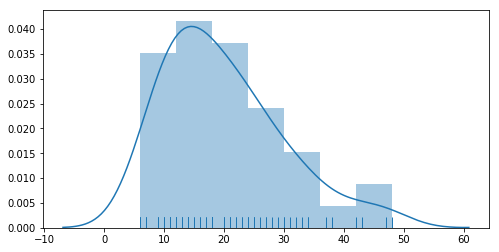

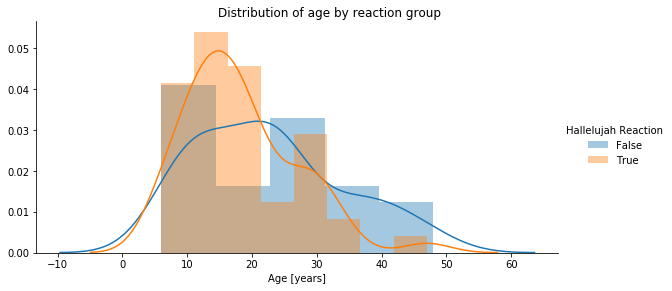

In [68]:
run_tests('Age [years]', 'age', bins=None, normed=False, kde=True, bw='normal_reference', x_lim=None, plots=True, print_output=True)

In [79]:
df_results = pd.DataFrame({})

for c in personality_cols:
    try:
        result = run_tests(c, c)
        df_results = pd.concat([df_results, pd.DataFrame(result, index=[c])])
    except:
        print(f'Could not run tests for {c}')

In [81]:
df_results = df_results.sort_values(by='u_p')

i = np.arange(1, df_results.shape[0] + 1)
m = len(i)
Q = 0.25
benjamini_hochberg = ((i * 1.) / m) * Q
df_results['bh_threshold'] = benjamini_hochberg
df_results['significant'] = df_results.u_p < df_results.bh_threshold

df_results

,mean_true,mean_false,median_true,median_false,t_stat,t_p,u_stat,u_p,bh_threshold,significant
personality_outgoing,3.191489,2.862069,3.0,3.0,1.220221,0.226256,791.5,0.226393,0.025,False
personality_imagination,4.170213,3.793103,4.0,4.0,1.527140,0.133940,785.0,0.239805,0.050,False
personality_trusting,3.446809,3.724138,4.0,4.0,-1.106225,0.272212,597.5,0.345103,0.075,False
personality_artistic,2.106383,2.379310,2.0,2.0,-1.018515,0.311752,607.0,0.405878,0.100,False
personality_stress,3.000000,3.103448,3.0,3.0,-0.400169,0.690185,638.5,0.635873,0.125,False
personality_fault,3.425532,3.517241,3.0,4.0,-0.460086,0.646803,643.5,0.666657,0.150,False
personality_nervous,3.638298,3.724138,4.0,4.0,-0.308660,0.758448,648.0,0.712090,0.175,False
personality_thorough,3.063830,3.000000,3.0,3.0,0.265323,0.791498,711.0,0.746022,0.200,False
personality_lazy,3.638298,3.655172,4.0,4.0,-0.059317,0.952859,686.0,0.964489,0.225,False
personality_reserved,3.127660,3.137931,3.0,3.0,-0.042184,0.966465,678.5,0.977649,0.250,False


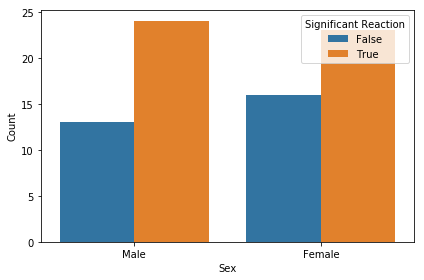

In [82]:
sns.countplot(x='sex', hue='critical_reaction', data=df_all)
plt.xticks(ticks=[0,1], labels=['Male', 'Female'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Significant Reaction')
plt.tight_layout()
plt.savefig(f'hallelujah_reaction_bar_sex_by_reaction_{notebook_song_name}_new_split.pdf')

In [83]:
# Chi-squared test of male/female proportions

cross = pd.crosstab(df_all['sex'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of sex vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
sex,,
female,13,24
male,16,23


Chi-squared test of sex vs hallelujah reaction proportions
Test statistic: 0.0854
p-value: 0.7702
Degrees of freedom: 1


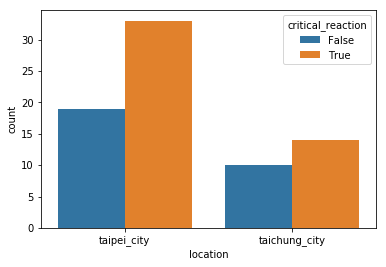

In [84]:
sns.countplot(x='location', hue='critical_reaction', data=df_all)

In [85]:
# Chi-squared test of location proportions

cross = pd.crosstab(df_all['location'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of location vs hallelujah reaction proportions')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
location,,
taichung_city,10,14
taipei_city,19,33


Chi-squared test of location vs hallelujah reaction proportions
Test statistic: 0.0302
p-value: 0.8620
Degrees of freedom: 1


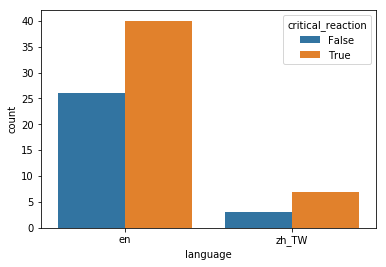

In [86]:
sns.countplot(x='language', hue='critical_reaction', data=df_all)

In [87]:
# Chi-squared test of language proportions

cross = pd.crosstab(df_all['language'], df_all['critical_reaction'])
display(cross)
chi2, p, dof, table = sps.chi2_contingency(cross)
print('Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)')
print('Test statistic: {:.4f}'.format(chi2))
print('p-value: {:.4f}'.format(p))
print('Degrees of freedom: {}'.format(dof))

critical_reaction,False,True
language,,
en,26,40
zh_TW,3,7


Chi-squared test of language vs hallelujah reaction proportions (for Taiwanese, English, and NA)
Test statistic: 0.0487
p-value: 0.8254
Degrees of freedom: 1


Sources for Hotelling's $T^2$:
- https://ncss-wpengine.netdna-ssl.com/wp-content/themes/ncss/pdf/Procedures/NCSS/Hotellings_Two-Sample_T2.pdf
- https://onlinecourses.science.psu.edu/stat505/node/100/

In [88]:
def hotelling_t2(X_1, X_2, alpha):
    
    import scipy.stats as sps
    
    n_1 = len(X_1)
    n_2 = len(X_2)

    y_1 = X_1.mean().as_matrix()
    y_1 = y_1.reshape(len(y_1), -1)
    y_2 = X_2.mean().as_matrix()
    y_2 = y_2.reshape(len(y_2), -1)

    # Covariance matrices
    S_1 = np.cov(X_1.astype(np.float64).T)
    S_2 = np.cov(X_2.astype(np.float64).T)

    # Pooled variance
    S_pooled_num = ((n_1 - 1) * S_1) + ((n_2 - 1) * S_2)
    S_pooled_denom = n_1 + n_2 - 2
    S_pooled = S_pooled_num / S_pooled_denom
    
    T_2 = (n_1 * n_2) / (n_1 + n_2)
    T_2 = T_2 * np.matmul((y_1 - y_2).T, np.linalg.pinv(S_pooled))
    T_2 = np.matmul(T_2, (y_1 - y_2))
    T_2 = T_2.squeeze()
    
    p = len(X_1.columns)
    F_num = n_1 + n_2 - p - 1
    F_denom = p * (n_1 + n_2 - 2)
    F = (F_num / F_denom) * T_2
    F = F.squeeze()
    
    df_1 = p
    df_2 = n_1 + n_2 - p - 1
    F_dist = sps.f(df_1, df_2)
    p_value = F_dist.cdf(F)
    
    # Calculate effect size
    D_2 = ((n_1 + n_2) * T_2) / (n_1 * n_2)
    
    return({
        'T2': T_2,
        'F': F,
        'df': (df_1, df_2),
        'p': p_value,
        'D2': D_2
    })

# Pairwise Hotelling's $T^2$

In [89]:
import itertools

plot_vars = ['song_activity', 
             'song_engagement', 
             'song_familiarity', 
             'song_like_dislike', 
             'song_positivity', 
             'song_tension', 
             'age', 
             'musical_expertise', 
             'concentration', 
             'personality_artistic', 
             'personality_fault', 
             'personality_imagination', 
             'personality_lazy', 
             'personality_nervous', 
             'personality_outgoing', 
             'personality_reserved', 
             'personality_stress', 
             'personality_thorough', 
             'personality_trusting']

pairs = list(itertools.combinations(plot_vars, 2))

results = pd.DataFrame(columns=['p', 'adjustedP', 'F', 'T2', 'df1', 'df2', 'D2'])

for pair in pairs:
    
    test_vars = list(pair)
    test_vars.append('critical_reaction')
    df_pair = df_all[test_vars].dropna()
    df_pair_1 = df_pair[df_pair['critical_reaction'] == False].drop(['critical_reaction'], axis=1)
    df_pair_2 = df_pair[df_pair['critical_reaction'] == True].drop(['critical_reaction'], axis=1)
    
    mardia_result = mardia(df_pair.drop(['critical_reaction'], axis=1), unbiased_cov=True)
    if mardia_result[2]['result']:
        pass

    t2_results = hotelling_t2(df_pair_1, df_pair_2, 0.05)
    p = t2_results['p']
    adjusted_p = p * len(pairs)
    if adjusted_p > 1:
        adjusted_p = 1
        
    row = pd.DataFrame(
        {
            'p': t2_results['p'], 
            'adjustedP': adjusted_p,
            'F': t2_results['F'], 
            'T2': t2_results['T2'], 
            'df1': t2_results['df'][0], 
            'df2': t2_results['df'][1],
            'D2': t2_results['D2']
        }, 
        index=[pair])

    results = pd.concat([results, row])
    
alpha = 0.5
    
with pd.option_context('display.max_rows', None, 'display.float_format', lambda x: '%.5f' % x):
    display('Tests for difference between combined means of {} and {} between hallelujah reaction groups:'.format(pair[0], pair[1]))
    display(results.sort_values(by='p'))

results.to_csv('hotelling_comparisons_{}.csv'.format(notebook_song_name))

/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/paperspace/anaconda3/envs/fastai/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


'Tests for difference between combined means of personality_thorough and personality_trusting between hallelujah reaction groups:'

,p,adjustedP,F,T2,df1,df2,D2
"(personality_lazy, personality_reserved)",0.00238,0.40691,0.00238,0.00483,2,73,0.00027
"(song_tension, personality_lazy)",0.01497,1,0.01508,0.03058,2,73,0.00171
"(song_tension, personality_reserved)",0.01510,1,0.01522,0.03086,2,73,0.00172
"(song_activity, personality_reserved)",0.01903,1,0.01921,0.03895,2,73,0.00217
"(song_activity, personality_lazy)",0.02138,1,0.02162,0.04383,2,73,0.00244
"(concentration, personality_lazy)",0.03133,1,0.03185,0.06456,2,73,0.00360
"(concentration, personality_reserved)",0.03404,1,0.03465,0.07026,2,73,0.00392
"(personality_reserved, personality_thorough)",0.03504,1,0.03569,0.07236,2,73,0.00403
"(personality_lazy, personality_thorough)",0.03604,1,0.03673,0.07446,2,73,0.00415
"(song_activity, concentration)",0.04214,1,0.04308,0.08734,2,73,0.00487


In [21]:
if results[results.adjustedP <= alpha].shape[0] > 0:
    for pair in results.index.values[0:3]:
        g = sns.FacetGrid(df_all[[pair[0], pair[1], 'critical_reaction']], col='critical_reaction', height=6, aspect=1, margin_titles=True)
        g.map(sns.kdeplot, pair[0], pair[1], cmap='Reds', shade=True, shade_lowest=False, alpha=0.65)
        g.savefig('hallelujah_reaction_distributions_{}_{}_{}_by_reaction.pdf'.format(notebook_song_name, pair[0], pair[1]))
else:
    print('No significant results to plot')

No significant results to plot
